<a href="https://colab.research.google.com/github/micah-shull/Statistics/blob/main/Statistics_003_two_sample_t_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Two-Sample T-Tests**

#### **What Are Two-Sample T-Tests?**
A two-sample t-test, also known as an **independent t-test**, is a statistical method used to compare the means of two independent groups to determine if the difference between them is statistically significant. It answers the question: **“Are the means of these two groups significantly different from each other?”**

---

#### **Why Are Two-Sample T-Tests Valuable?**
1. **Comparing Two Groups**:
   - It helps identify whether there is a meaningful difference between two populations or experimental conditions.
   
2. **Simple Yet Powerful**:
   - When the assumptions (e.g., normality and equal variances) are met, the two-sample t-test is both simple and statistically powerful.


3. **Foundation for Hypothesis Testing**:
   - A key tool for hypothesis testing, where it allows researchers to make data-driven conclusions about differences between groups.

---

#### **When Should You Use Two-Sample T-Tests?**
1. **Independent Groups**:
   - The two groups being compared must be independent (e.g., different subjects in each group).
   
2. **Continuous Dependent Variable**:
   - The test compares the means of a continuous variable (e.g., weight, height, score) across two groups.

3. **Assumptions Are Met**:
   - The data in each group should:
     - Follow a normal distribution (can be checked with tests like Shapiro-Wilk).
     - Have approximately equal variances (can be checked with tests like Levene's Test).
   - For large sample sizes, the t-test is robust to slight deviations from normality.

4. **Sample Size**:
   - Works well with small to medium sample sizes, but for very large samples, even small differences may become statistically significant, requiring careful interpretation.

---

#### **Real-World Use Cases**
1. **Healthcare**:
   - Comparing the effectiveness of two medications (e.g., average reduction in blood pressure with Drug A vs. Drug B).
   
2. **Education**:
   - Comparing test scores of students taught using two different teaching methods.

3. **Marketing**:
   - Evaluating the performance of two advertisements by comparing average sales generated in two regions.

4. **Agriculture**:
   - Comparing crop yields between two types of fertilizers.

5. **Manufacturing**:
   - Comparing the mean defect rates of products from two production lines.

---

#### **Key Assumptions and Alternatives**
1. **Key Assumptions**:
   - Data in each group is normally distributed.
   - Variances are equal (if not, consider Welch’s t-test).
   - Observations are independent.

2. **Alternatives**:
   - **Welch’s t-test**: If variances are unequal.
   - **Mann-Whitney U Test**: A non-parametric alternative for non-normal data.






### Load Iris Data

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
# Convert to a DataFrame
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target
iris_df['species'] = iris_df['species'].map({i: name for i, name in enumerate(iris.target_names)})
# iris_df['species'] = iris_df['species'].astype('category')
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### **Question**  
Do `setosa` and `versicolor` have different average sepal widths?

---

### **Two-Sample T-Test**  
- **Null Hypothesis (\(H_0\))**: The average sepal width of `setosa` is equal to the average sepal width of `versicolor`.  
- **Alternative Hypothesis (\(H_1\))**: The average sepal width of `setosa` is not equal to the average sepal width of `versicolor`.  

---

### **Analysis and Interpretation**  
- The boxplot shows the distribution of sepal widths for `setosa` and `versicolor`. The separation between the two distributions suggests a difference in their means.  
- The t-statistic of \(9.45\) indicates a large difference between the means of the two groups relative to the variability within the groups.  
- The p-value (\(< 0.0001\)) is far below the significance level (\(\alpha = 0.05\)), providing strong evidence to reject the null hypothesis.  

---

### **Conclusion**  
The statistical test and visualization indicate that the average sepal widths of `setosa` and `versicolor` are significantly different.  


Two-Sample T-Test:
T-Statistic: 9.45
P-Value: 0.0000
Conclusion: Reject the null hypothesis. The average sepal widths of setosa and versicolor are significantly different.




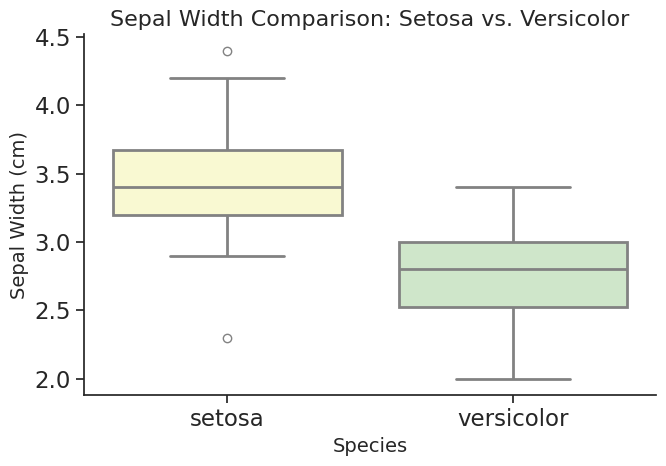

In [ ]:
from scipy.stats import ttest_ind

# Set Seaborn theme, style, and palette
theme_style = "ticks"
palette_name = "Pastel1_r"
context_scale = "notebook"

sns.set_theme(style=theme_style, palette=palette_name)
sns.set_context(context_scale, font_scale=1.5, rc={"lines.linewidth": 2.5})

# Extract sepal width data for the two species
setosa_sepal_width = iris_df[iris_df['species'] == 'setosa']['sepal width (cm)']
versicolor_sepal_width = iris_df[iris_df['species'] == 'versicolor']['sepal width (cm)']

# Perform a two-sample t-test
t_stat, p_value = ttest_ind(setosa_sepal_width, versicolor_sepal_width)

# Output results
print("Two-Sample T-Test:")
print(f"T-Statistic: {t_stat:.2f}")
print(f"P-Value: {p_value:.4f}")

# Interpretation
alpha = 0.05
if p_value <= alpha:
    print("Conclusion: Reject the null hypothesis. The average sepal widths of setosa and versicolor are significantly different.")
else:
    print("Conclusion: Fail to reject the null hypothesis. There is no significant difference in sepal widths between the two species.")
print('\n')

# Visualization
plt.figure(figsize=(7,5))

# Boxplot for comparison
sns.boxplot(data=iris_df[iris_df['species'].isin(['setosa', 'versicolor'])],
            x='species', y='sepal width (cm)', hue='species',
            linewidth=2, palette=palette_name)
plt.title("Sepal Width Comparison: Setosa vs. Versicolor", fontsize=16)
plt.xlabel("Species", fontsize=14)
plt.ylabel("Sepal Width (cm)", fontsize=14)
sns.despine()
plt.tight_layout()
plt.show()



#### **Understanding "Variability Within Groups"**

The term **"variability within groups"** refers to the natural spread or dispersion of individual data points around the group mean within each of the two groups being compared. In the context of a t-test, this variability is used to assess whether the observed difference between group means is large compared to the typical variation seen in the data.

---

### **Breaking It Down**
1. **Group Means**:
   - Each group has its own mean, which is the central value around which the data points are distributed.
   - Example:
     - Group 1 Mean: 5.5
     - Group 2 Mean: 6.2

2. **Within-Group Variability**:
   - This is the spread of individual data points within each group around their respective means.
   - Measured using the **standard deviation (SD)** or **variance** of the data within each group.
   - Example:
     - Group 1: Some values are \(5.1, 5.4, 5.6\) (small spread = low variability).
     - Group 2: Some values are \(6.0, 6.3, 6.4\) (small spread = low variability).

3. **Role in the t-Test**:
   - The t-test compares the **difference between the group means** to the **variability within the groups**.
   - If the difference in means is large relative to the variability within groups, the t-statistic will be large, suggesting the groups are significantly different.
   - Conversely, if the variability within groups is high, even a large difference in means might not lead to a significant t-statistic.

---

### **Why It Matters**
- **Low Variability Within Groups**:
  - If the data points are tightly clustered around their group means, any observed difference in means is more likely to be meaningful (statistically significant).
  - Example: The difference between two precise groups like test scores from controlled experiments.

- **High Variability Within Groups**:
  - If the data points are widely spread within each group, it becomes harder to attribute the observed difference in means to anything other than random variation.
  - Example: Measurements with high noise or uncontrolled conditions.

---

### **Relation to the t-Statistic**
The t-statistic is calculated as:

t = Difference in Group Means / Standard Error of the Difference


The **standard error of the difference** is derived from the variability within groups and the sample sizes. Lower within-group variability reduces the denominator, making the t-statistic larger and more likely to detect a significant difference.

---

### **Key Takeaway**
- Variability within groups reflects how much the individual data points deviate from their group means.
- A t-test evaluates whether the difference in group means is large enough to stand out against this variability.
- Understanding within-group variability is crucial for interpreting the t-statistic and assessing the significance of results.


### **Question**  
Do `versicolor` and `virginica` have different average petal lengths?

---

### **Two-Sample T-Test**  
- **Null Hypothesis (\(H_0\))**: The average petal length of `versicolor` is equal to the average petal length of `virginica`.  
- **Alternative Hypothesis (\(H_1\))**: The average petal length of `versicolor` is not equal to the average petal length of `virginica`.  

---

### **Analysis and Interpretation**  
- The boxplot shows the distribution of petal lengths for `versicolor` and `virginica`. The distinct separation between the two distributions supports a significant difference in their means.  
- The t-statistic of \(-12.60\) indicates a large negative difference between the means of the two groups relative to the variability within the groups.  
- The p-value (\(< 0.0001\)) is far below the significance level (\(\alpha = 0.05\)), providing strong evidence to reject the null hypothesis.  

---

### **Conclusion**  
The statistical test and visualization indicate that the average petal lengths of `versicolor` and `virginica` are significantly different.  



Two-Sample T-Test:
T-Statistic: -12.60
P-Value: 0.0000
Conclusion: Reject the null hypothesis. The average petal lengths of versicolor and virginica are significantly different.




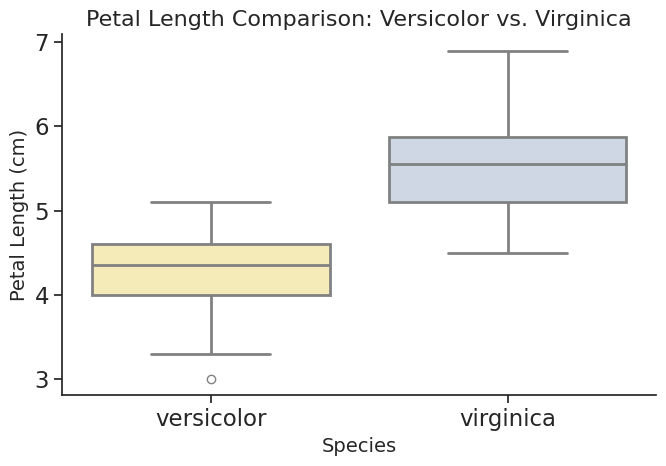

In [ ]:
from scipy.stats import ttest_ind

palette_name = "Pastel2_r"

# Extract petal length data for the two species
versicolor_petal_length = iris_df[iris_df['species'] == 'versicolor']['petal length (cm)']
virginica_petal_length = iris_df[iris_df['species'] == 'virginica']['petal length (cm)']

# Perform a two-sample t-test
t_stat, p_value = ttest_ind(versicolor_petal_length, virginica_petal_length)

# Output results
print("Two-Sample T-Test:")
print(f"T-Statistic: {t_stat:.2f}")
print(f"P-Value: {p_value:.4f}")

# Interpretation
alpha = 0.05
if p_value <= alpha:
    print("Conclusion: Reject the null hypothesis. The average petal lengths of versicolor and virginica are significantly different.")
else:
    print("Conclusion: Fail to reject the null hypothesis. There is no significant difference in petal lengths between the two species.")
print('\n')

# Visualization
plt.figure(figsize=(7,5))

# Boxplot for comparison
sns.boxplot(data=iris_df[iris_df['species'].isin(['versicolor', 'virginica'])],
            x='species', y='petal length (cm)', hue='species',
            linewidth=2, palette=palette_name)
plt.title("Petal Length Comparison: Versicolor vs. Virginica", fontsize=16)
plt.xlabel("Species", fontsize=14)
plt.ylabel("Petal Length (cm)", fontsize=14)
sns.despine()
plt.tight_layout()
plt.show()


### **Question**  
Do `setosa` and `virginica` have different average sepal lengths?

---

### **Two-Sample T-Test**  
- **Null Hypothesis (\(H_0\))**: The average sepal length of `setosa` is equal to the average sepal length of `virginica`.  
- **Alternative Hypothesis (\(H_1\))**: The average sepal length of `setosa` is not equal to the average sepal length of `virginica`.  

---

### **Analysis and Interpretation**  
- The boxplot shows the distribution of sepal lengths for `setosa` and `virginica`. The two distributions are distinctly separated, suggesting a significant difference in their means.  
- The t-statistic of \(-15.39\) indicates a large negative difference between the means of the two groups relative to their variability.  
- The p-value (\(< 0.0001\)) is far below the significance level (\(\alpha = 0.05\)), providing strong evidence to reject the null hypothesis.  

---

### **Conclusion**  
The statistical test and visualization indicate that the average sepal lengths of `setosa` and `virginica` are significantly different.  



Two-Sample T-Test:
T-Statistic: -15.39
P-Value: 0.0000
Conclusion: Reject the null hypothesis. The average sepal lengths of setosa and virginica are significantly different.




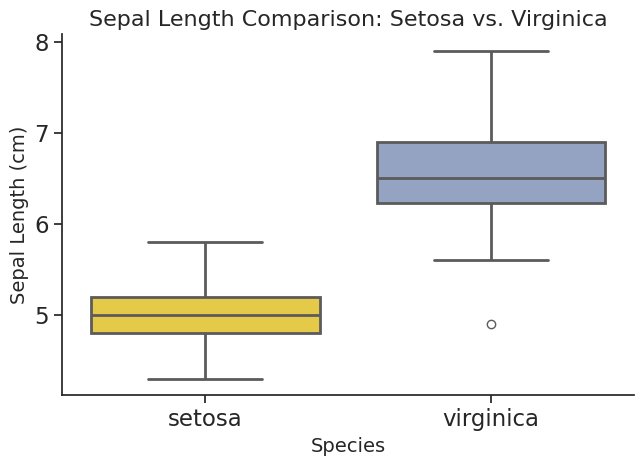

In [ ]:
palette_name = "Set2_r"

# Extract sepal length data for the two species
setosa_sepal_length = iris_df[iris_df['species'] == 'setosa']['sepal length (cm)']
virginica_sepal_length = iris_df[iris_df['species'] == 'virginica']['sepal length (cm)']

# Perform a two-sample t-test
t_stat, p_value = ttest_ind(setosa_sepal_length, virginica_sepal_length)

# Output results
print("Two-Sample T-Test:")
print(f"T-Statistic: {t_stat:.2f}")
print(f"P-Value: {p_value:.4f}")

# Interpretation
alpha = 0.05
if p_value <= alpha:
    print("Conclusion: Reject the null hypothesis. The average sepal lengths of setosa and virginica are significantly different.")
else:
    print("Conclusion: Fail to reject the null hypothesis. There is no significant difference in sepal lengths between the two species.")
print('\n')

# Visualization
plt.figure(figsize=(7,5))

# Boxplot for comparison
sns.boxplot(data=iris_df[iris_df['species'].isin(['setosa', 'virginica'])],
            x='species', y='sepal length (cm)', hue='species',
            linewidth=2, palette=palette_name)
plt.title("Sepal Length Comparison: Setosa vs. Virginica", fontsize=16)
plt.xlabel("Species", fontsize=14)
plt.ylabel("Sepal Length (cm)", fontsize=14)
sns.despine()
plt.tight_layout()
plt.show()
